<a href="https://colab.research.google.com/github/dhruvKmathur/Machine-Learning-Projects/blob/master/Oil_Price_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [ ]:
#importing data from yahoo for 2017 to 2020
df = web.DataReader('CL=F', data_source='yahoo', start='2017-01-01', end='2020-07-26')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,55.240002,52.110001,54.200001,52.330002,271094.0,52.330002
2017-01-04,53.430000,52.150002,52.490002,53.259998,727793.0,53.259998
2017-01-05,54.119999,52.790001,53.389999,53.759998,512641.0,53.759998
2017-01-06,54.320000,53.320000,53.730000,53.990002,517362.0,53.990002
2017-01-09,53.830002,51.759998,53.750000,51.959999,528333.0,51.959999
...,...,...,...,...,...,...
2020-07-20,40.910000,39.830002,40.360001,40.650002,8747221.0,40.650002
2020-07-21,42.400002,40.840000,40.840000,41.759998,1323868.0,41.759998
2020-07-22,42.029999,41.139999,41.599998,41.730000,146732897.0,41.730000


In [ ]:
df.shape

(913, 6)

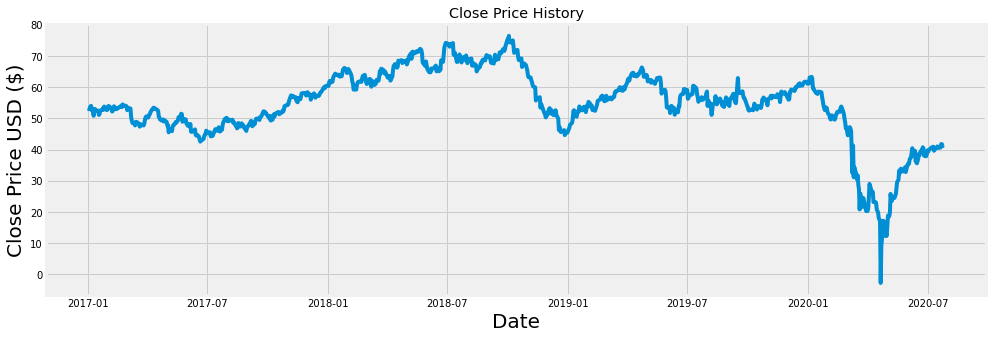

In [ ]:
#Plotting the the graph
plt.figure(figsize=(15,5))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.show()

In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

731

In [ ]:
#sale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.69569063],
       [0.70744339],
       [0.71376211],
       [0.71666876],
       [0.69101474],
       [0.67660808],
       [0.69467961],
       [0.70428404],
       [0.69619609],
       [0.69758621],
       [0.67989384],
       [0.68355866],
       [0.69682795],
       [0.70099832],
       [0.70643242],
       [0.70099832],
       [0.71401486],
       [0.70630602],
       [0.69948185],
       [0.70175659],
       [0.71527864],
       [0.71098191],
       [0.71464677],
       [0.70428404],
       [0.69366859],
       [0.69581698],
       [0.70415768],
       [0.71502588],
       [0.70327307],
       [0.70668518],
       [0.70554781],
       [0.70870717],
       [0.70921267],
       [0.71755338],
       [0.71161377],
       [0.72248197],
       [0.71666876],
       [0.71742698],
       [0.71692147],
       [0.71464677],
       [0.69922909],
       [0.70832806],
       [0.70668518],
       [0.70592692],
       [0.66978385],
       [0.65714642],
       [0.64716289],
       [0.646

In [ ]:
#create the trainig dataset
#create he scaled training dataset
train_data = scaled_data[0:training_data_len,:]

#spliting the data in x-train and y_train datset
x_train = []
y_train = []

for i in range (60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.69569063, 0.70744339, 0.71376211, 0.71666876, 0.69101474,
       0.67660808, 0.69467961, 0.70428404, 0.69619609, 0.69758621,
       0.67989384, 0.68355866, 0.69682795, 0.70099832, 0.70643242,
       0.70099832, 0.71401486, 0.70630602, 0.69948185, 0.70175659,
       0.71527864, 0.71098191, 0.71464677, 0.70428404, 0.69366859,
       0.69581698, 0.70415768, 0.71502588, 0.70327307, 0.70668518,
       0.70554781, 0.70870717, 0.70921267, 0.71755338, 0.71161377,
       0.72248197, 0.71666876, 0.71742698, 0.71692147, 0.71464677,
       0.69922909, 0.70832806, 0.70668518, 0.70592692, 0.66978385,
       0.65714642, 0.64716289, 0.64602552, 0.63743206, 0.65183872,
       0.6504486 , 0.65082771, 0.64375078, 0.63262982, 0.64147603,
       0.63717931, 0.64059142, 0.63755841, 0.64564636, 0.66005303])]
[0.6706684699542784]

[array([0.69569063, 0.70744339, 0.71376211, 0.71666876, 0.69101474,
       0.67660808, 0.69467961, 0.70428404, 0.69619609, 0.69758621,
       0.67989384, 0.68355866, 0.696

In [ ]:
#converting x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(671, 60, 1)

In [ ]:
#build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1,epochs=1)

Epoch 1/1
671/671 [==============================] - 28s 42ms/step - loss: 0.0050


In [ ]:
#creatinf testing dataset
test_data = scaled_data[training_data_len - 60: , :]

#creating x_test and y_tets datasets
x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i -60:i, 0])

In [ ]:
#converting data to numpy array
x_test = np.array(x_test)

In [ ]:
#reshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#get predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#RMSE score
rmse = np.sqrt( np.mean( predictions - y_test)**2 )
rmse

1.4008333434115399

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


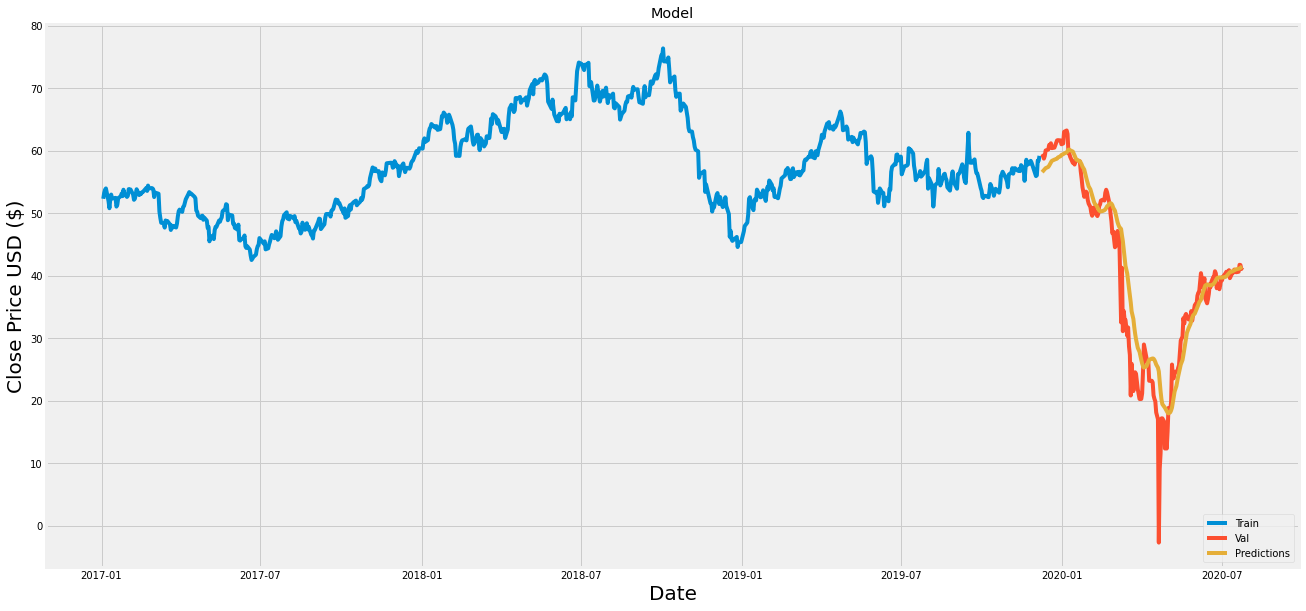

In [ ]:
#plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualization
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val','Predictions'], loc='lower right')
plt.show()

In [ ]:
#valid and predicted prices
valid

,Close,Predictions
Date,,
2019-12-09,59.020000,56.598690
2019-12-10,59.240002,56.760708
2019-12-11,58.759998,56.939442
2019-12-12,59.180000,57.088184
2019-12-13,60.070000,57.236797
...,...,...
2020-07-20,40.650002,41.132450
2020-07-21,41.759998,41.170193
2020-07-22,41.730000,41.263489


In [ ]:
#get quote
oil_quote = web.DataReader('CL=F', data_source='yahoo', start='2017-01-01', end='2020-07-26')

#new dataframe
new_df = oil_quote.filter(['Close'])

#getting the closing price for last 60 days and converting dataframe into array
last_60_days = new_df[-60:].values

#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#create empty list
X_test = []

#append last 60 days 
X_test.append(last_60_days_scaled)

#converting X_test dataset to numpy array
X_test = np.array(X_test)

#reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#get teh predicted scaled prices
pred_price = model.predict(X_test)

#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[41.546913]]


In [ ]:
oil_quote2 = web.DataReader('CL=F', data_source='yahoo', start='2020-07-24', end='2020-07-24')
print(oil_quote2['Close'])

Date
2020-07-24    41.34
Name: Close, dtype: float64
